In [8]:
import gym
import logging
from d4rl.pointmaze import waypoint_controller
from d4rl.pointmaze import maze_model
import matplotlib.pyplot as plt
import numpy as np
import pickle
import gzip
import h5py
import argparse
import os
import sys

sys.path.append('/root/diffuser_chain_hd/')

import diffuser


def reset_data():
    return {'observations': [],
            'actions': [],
            'terminals': [],
            'rewards': [],
            'infos/goal': [],
            'infos/qpos': [],
            'infos/qvel': [],
            }

def append_data(data, s, a, tgt, done, env_data):
    data['observations'].append(s)
    data['actions'].append(a)
    data['rewards'].append(0.0)
    data['terminals'].append(done)
    data['infos/goal'].append(tgt)
    data['infos/qpos'].append(env_data.qpos.ravel().copy())
    data['infos/qvel'].append(env_data.qvel.ravel().copy())

def npify(data):
    for k in data:
        if k == 'terminals':
            dtype = np.bool_
        else:
            dtype = np.float32

        data[k] = np.array(data[k], dtype=dtype)


In [9]:
env_name = 'maze2d-xxlarge-v1'
env = gym.make(env_name)

[8, 1]


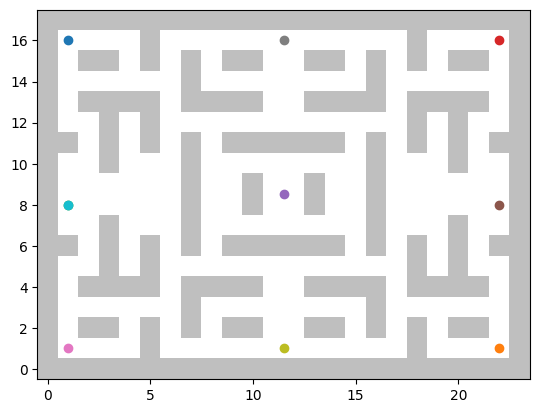

In [50]:
_background = env.maze_arr == 10 

# Plot environment background
plt.imshow(
    _background * 0.5,
    cmap=plt.cm.binary,
    vmin=0,
    vmax=1,
    origin='lower',
    alpha=0.5,
)

# def set_target(self, target_location=None):
#     if target_location is None:
#         idx = self.np_random.choice(len(self.empty_and_goal_locations))
#         reset_location = np.array(self.empty_and_goal_locations[idx]).astype(self.observation_space.dtype)
#         target_location = reset_location + self.np_random.uniform(low=-.1, high=.1, size=self.model.nq)
#     self._target = target_location
targets = [[16,1], [1,22], [8,1], [16,22], [8.5,11.5], [8, 22], [1,1], [16, 11.5], [1, 11.5]]

env.set_target(targets[2])
env.reset()


for t in targets:
    plt.scatter(t[1], t[0])

t = env.get_target()
print(t)
plt.scatter(t[1], t[0])


In [62]:
np.random.randint(2)

0